In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","label"])


In [3]:
train_imgs_path=train_imgs_path.sort_values(by=['Train Dataset'])
train_labels=train_labels.sort_values(by=['Train Labeled Studies'])
test_imgs_path=test_imgs_path.sort_values(by=['Test Dataset'])
test_labels=test_labels.sort_values(by=['Test Labeled Studies'])

In [4]:
test_labels['Body Part']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study Type']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])


In [5]:
train_labels['Body Part']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])


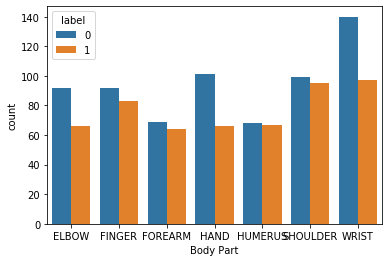

In [6]:
import seaborn as sns
sns.countplot(data=test_labels,x='Body Part',hue='label')

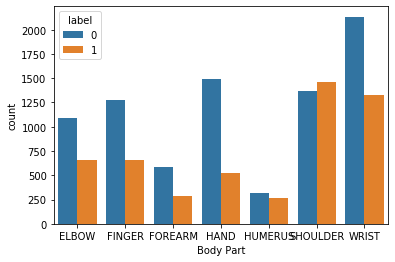

In [7]:
sns.countplot(data=train_labels,x='Body Part',hue='label')


In [8]:
import glob
import cv2
import os


In [9]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(cv2.resize(img,(224,224)))
           
    return data


In [10]:
import matplotlib.pyplot as plt


In [11]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


'F:\7th' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()


In [13]:
def stretching_Data(files_,dim):
    stretch=[]
    for e in range(0,len(files_)):
        f=files_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            stretch.append(cv2.resize(dd[n],dsize=dim))
               
    return stretch


In [14]:
def stretching_Labels(labels_):
    labels=[]
    for e in range(0,len(labels_)):
        l=labels_.iloc[e]['label']
        f=labels_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            labels.append(l)
    return labels


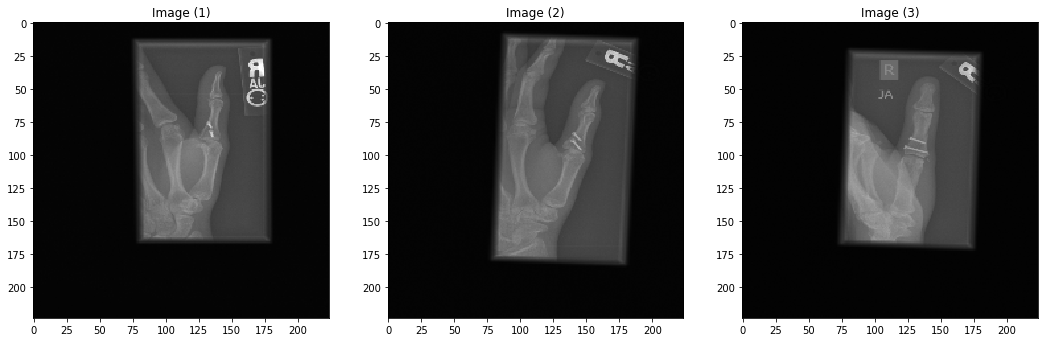

In [15]:
l=train_labels.iloc[2000]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)


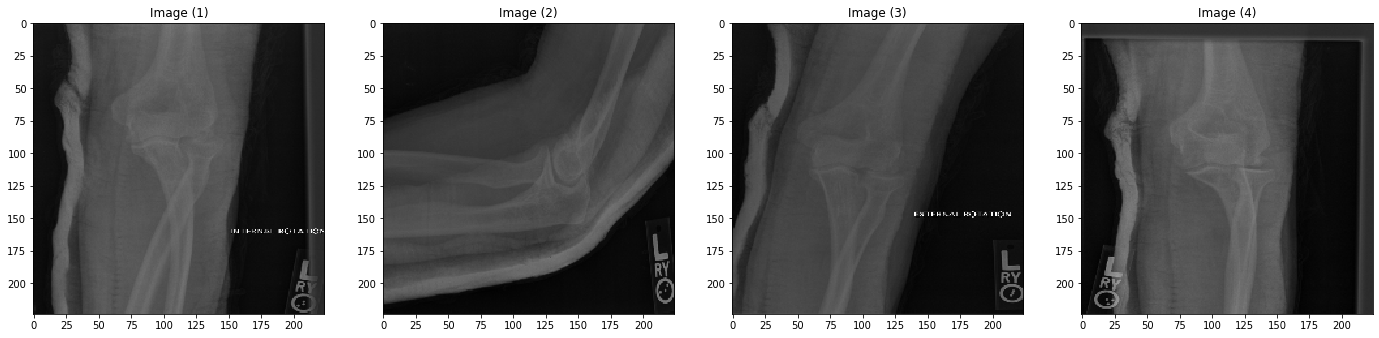

In [16]:
f=test_labels.iloc[1]['Test Labeled Studies']
images=fileImagesOfStudy(f)
show_images(images)


In [17]:
len(train_labels)

13457

In [18]:
len(test_labels)

1199

In [19]:
train_labels

,Train Labeled Studies,label,Body Part,Study Type
6218,MURA-v1.1/train/XR_ELBOW/patient00011/study1_n...,0,ELBOW,study1
5866,MURA-v1.1/train/XR_ELBOW/patient00016/study1_p...,1,ELBOW,study1
6672,MURA-v1.1/train/XR_ELBOW/patient00026/study1_n...,0,ELBOW,study1
6784,MURA-v1.1/train/XR_ELBOW/patient00031/study1_n...,0,ELBOW,study1
5594,MURA-v1.1/train/XR_ELBOW/patient00034/study1_p...,1,ELBOW,study1
...,...,...,...,...
10555,MURA-v1.1/train/XR_WRIST/patient09078/study1_n...,0,WRIST,study1
10556,MURA-v1.1/train/XR_WRIST/patient09079/study1_n...,0,WRIST,study1
10557,MURA-v1.1/train/XR_WRIST/patient09080/study1_n...,0,WRIST,study1
10560,MURA-v1.1/train/XR_WRIST/patient09081/study1_n...,0,WRIST,study1


In [20]:
Y_train=[]
X_train=[]
##len(train_labels)
for i in range (0, 1700): 
    l=train_labels.iloc[i]['Train Labeled Studies']
    images=fileImagesOfStudy(l)
    for k in range (0,len(images)):
        Y_train.append(train_labels['label'][i])
        X_train.append(images[k])


In [21]:
Y_test=[]
X_test=[]
for i in range (0,50):
    f=test_labels.iloc[i]['Test Labeled Studies']
    images=fileImagesOfStudy(f)
    for k in range (0,len(images)):
        Y_test.append(test_labels['label'][i])
        X_test.append(images[k])


In [22]:
print(len(X_test))
print(len(Y_test))

140
140


In [23]:
print(len(X_train))
print(len(Y_train))

4768
4768


In [24]:
len(X_train[1])

224

In [25]:
len(X_test[1])

224

In [26]:
print(Y_train)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [27]:
print(Y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [79]:
#import needed packages
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,SeparableConv2D,BatchNormalization, Activation, Dense
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam


In [80]:
# dataset has 2 classes
from keras import regularizers

num_class = 2

# Base model without Fully connected Layers
base_model = MobileNet(include_top=False, weights='imagenet', input_shape=(224,224,3))
x=base_model.output
# Add some new Fully connected layers to 
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(x)
x = Dropout(0.5)(x)
x=Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(x) 
x = Dropout(0.5)(x)
preds=Dense(1, activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)


In [81]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


In [82]:
len(model.layers)


93

In [83]:
for layer in model.layers[:50]:
    layer.trainable=False
for layer in model.layers[50:]:
    layer.trainable=True


In [84]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [85]:
#rescaling images for network in x_train

In [86]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [87]:
X_train = np.array([x for x in X_train])
X_test = np.array([x for x in X_test])
Y_train = np.array([x for x in Y_train])
Y_test = np.array([x for x in Y_test])

In [88]:
history = model.fit(X_train, Y_train, epochs=5,validation_data=(X_test, Y_test))

Train on 4768 samples, validate on 140 samples
Epoch 1/5
4768/4768 [==============================] - 470s 99ms/step - loss: 7.1375 - acc: 0.8647 - val_loss: 1.2865 - val_acc: 0.9214
Epoch 2/5
4768/4768 [==============================] - 299s 63ms/step - loss: 2.1724 - acc: 0.8647 - val_loss: 1.3287 - val_acc: 0.9214
Epoch 3/5
4768/4768 [==============================] - 313s 66ms/step - loss: 2.1649 - acc: 0.8647 - val_loss: 1.4398 - val_acc: 0.9214
Epoch 4/5
4768/4768 [==============================] - 315s 66ms/step - loss: 2.1593 - acc: 0.8647 - val_loss: 1.6816 - val_acc: 0.9214
Epoch 5/5
4768/4768 [==============================] - 293s 61ms/step - loss: 2.1584 - acc: 0.8647 - val_loss: 1.3767 - val_acc: 0.9214


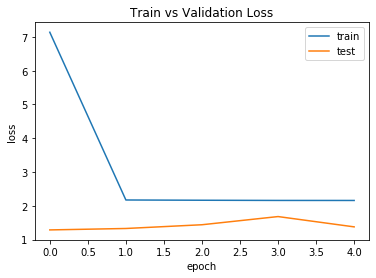

In [89]:
plt.plot(history.history['loss'])
plt.plot(history  .history['val_loss'])
plt.title("Train vs Validation Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
